In [112]:
from prophet import Prophet

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [114]:
data = pd.read_excel('E:/Pekerjaan/New Folder/data2023.xlsx')
data

,Date,Product Name,Sales Qty
0,2023-01-01 00:37:00,200 Choco,44
1,2023-01-01 01:06:00,500 Choco,44
2,2023-01-01 02:00:00,200 Vanilla,43
3,2023-01-01 04:12:00,200 Choco,46
4,2023-01-01 05:02:00,500 Choco,38
...,...,...,...
7302,2023-12-31 20:06:00,200 Choco,7999
7303,2023-12-31 20:36:00,200 Vanilla,15999
7304,2023-12-31 22:39:00,500 Choco,7999
7305,2023-12-31 23:15:00,500 Vanilla,7999


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7307 entries, 0 to 7306
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          7307 non-null   datetime64[ns]
 1   Product Name  7307 non-null   object        
 2   Sales Qty     7307 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 171.4+ KB


In [116]:
data.isna().sum()

Date            0
Product Name    0
Sales Qty       0
dtype: int64

In [117]:
data1 = pd.read_excel('E:/Pekerjaan/New Folder/laporan2024.xlsx')
data1

,Nama SKU,Tanggal,Penjualan
0,Vanilla 200 ML,2024-01-01,422
1,Choco 200 ML,2024-01-01,118
2,Choco 500 ML,2024-01-01,79
3,Almond 200 ML,2024-01-01,205
4,Vanilla 500 ML,2024-01-01,77
...,...,...,...
1520,Almond 200 ML,2024-10-31,92
1521,Choco 200 ML,2024-10-31,107
1522,Vanilla 200 ML,2024-10-31,277
1523,Choco 500 ML,2024-10-31,44


In [118]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Nama SKU   1525 non-null   object        
 1   Tanggal    1525 non-null   datetime64[ns]
 2   Penjualan  1525 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 35.9+ KB


In [119]:
data1.isna().sum()

Nama SKU     0
Tanggal      0
Penjualan    0
dtype: int64

# **Data Preparation/Pre-processing**

In [120]:
#ubah nama kolom
data1.columns = ['Product Name', 'Date', 'Sales Qty']
data1

,Product Name,Date,Sales Qty
0,Vanilla 200 ML,2024-01-01,422
1,Choco 200 ML,2024-01-01,118
2,Choco 500 ML,2024-01-01,79
3,Almond 200 ML,2024-01-01,205
4,Vanilla 500 ML,2024-01-01,77
...,...,...,...
1520,Almond 200 ML,2024-10-31,92
1521,Choco 200 ML,2024-10-31,107
1522,Vanilla 200 ML,2024-10-31,277
1523,Choco 500 ML,2024-10-31,44


In [121]:
#menggeser kolom
data1 = data1.reindex(['Date', 'Product Name', 'Sales Qty'], axis=1)
data1

,Date,Product Name,Sales Qty
0,2024-01-01,Vanilla 200 ML,422
1,2024-01-01,Choco 200 ML,118
2,2024-01-01,Choco 500 ML,79
3,2024-01-01,Almond 200 ML,205
4,2024-01-01,Vanilla 500 ML,77
...,...,...,...
1520,2024-10-31,Almond 200 ML,92
1521,2024-10-31,Choco 200 ML,107
1522,2024-10-31,Vanilla 200 ML,277
1523,2024-10-31,Choco 500 ML,44


In [122]:
#hapus "ML" pada kolom product name
data1['Product Name'] = data1['Product Name'].str.replace('ML', '')
data1

,Date,Product Name,Sales Qty
0,2024-01-01,Vanilla 200,422
1,2024-01-01,Choco 200,118
2,2024-01-01,Choco 500,79
3,2024-01-01,Almond 200,205
4,2024-01-01,Vanilla 500,77
...,...,...,...
1520,2024-10-31,Almond 200,92
1521,2024-10-31,Choco 200,107
1522,2024-10-31,Vanilla 200,277
1523,2024-10-31,Choco 500,44


In [123]:
#memindahkan angka yg dibelakang menjadi di depan
data1['Product Name'] = data1['Product Name'].apply(lambda x: " ".join(x.split(" ")[::-1]))
data1

,Date,Product Name,Sales Qty
0,2024-01-01,200 Vanilla,422
1,2024-01-01,200 Choco,118
2,2024-01-01,500 Choco,79
3,2024-01-01,200 Almond,205
4,2024-01-01,500 Vanilla,77
...,...,...,...
1520,2024-10-31,200 Almond,92
1521,2024-10-31,200 Choco,107
1522,2024-10-31,200 Vanilla,277
1523,2024-10-31,500 Choco,44


In [124]:
#menghapus apabila terdapat spasi
data1['Product Name'] = data1['Product Name'].str.strip()

In [125]:
#menggabungkan dataset
final_data = pd.concat([data, data1], ignore_index=True)
final_data

,Date,Product Name,Sales Qty
0,2023-01-01 00:37:00,200 Choco,44
1,2023-01-01 01:06:00,500 Choco,44
2,2023-01-01 02:00:00,200 Vanilla,43
3,2023-01-01 04:12:00,200 Choco,46
4,2023-01-01 05:02:00,500 Choco,38
...,...,...,...
8827,2024-10-31 00:00:00,200 Almond,92
8828,2024-10-31 00:00:00,200 Choco,107
8829,2024-10-31 00:00:00,200 Vanilla,277
8830,2024-10-31 00:00:00,500 Choco,44


In [126]:
product = pd.read_excel('E:/Pekerjaan/New Folder/master_product.xlsx')
product

,Product Name,Price,Updated At
0,200 Vanilla,7800,2023-01-01
1,200 Almond,8200,2023-01-01
2,200 Choco,8500,2023-01-01
3,500 Vanilla,20500,2023-01-01
4,500 Choco,23500,2023-01-01
5,200 Vanilla,8000,2024-01-01
6,200 Almond,8500,2024-01-01
7,200 Choco,9100,2024-03-01
8,500 Vanilla,19800,2024-06-01
9,500 Choco,21500,2024-06-01


In [127]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Product Name  10 non-null     object        
 1   Price         10 non-null     int64         
 2   Updated At    10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 368.0+ bytes


In [128]:
product.isna().sum()

Product Name    0
Price           0
Updated At      0
dtype: int64

Combine the final data (the merged data from 2023 and 2024) with the master data. Also, calculate the revenue by multiplying the Sales Quantity with the Price, using the updated price from the master data.

In [129]:
result = final_data.copy()
result['Price'] = None

for i, row in result.iterrows():
    product_name = row['Product Name']
    date         = row['Date']
    
    filtered_product = product[product['Product Name'] == product_name]
    
    valid_price = filtered_product[filtered_product['Updated At'] <= date]
    if not valid_price.empty:
        applicable_price = valid_price.sort_values('Updated At', ascending=False).iloc[0]['Price']
        result.at[i, 'Price'] = applicable_price
        
result['Revenue'] = result['Sales Qty'] * result['Price']
result

,Date,Product Name,Sales Qty,Price,Revenue
0,2023-01-01 00:37:00,200 Choco,44,8500,374000
1,2023-01-01 01:06:00,500 Choco,44,23500,1034000
2,2023-01-01 02:00:00,200 Vanilla,43,7800,335400
3,2023-01-01 04:12:00,200 Choco,46,8500,391000
4,2023-01-01 05:02:00,500 Choco,38,23500,893000
...,...,...,...,...,...
8827,2024-10-31 00:00:00,200 Almond,92,8500,782000
8828,2024-10-31 00:00:00,200 Choco,107,9100,973700
8829,2024-10-31 00:00:00,200 Vanilla,277,8000,2216000
8830,2024-10-31 00:00:00,500 Choco,44,21500,946000


In [130]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          8832 non-null   datetime64[ns]
 1   Product Name  8832 non-null   object        
 2   Sales Qty     8832 non-null   int64         
 3   Price         8832 non-null   object        
 4   Revenue       8832 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 345.1+ KB


In [131]:
#ubah tipe data
result['Price'] = pd.to_numeric(result['Price'], errors='coerce')
result['Revenue'] = pd.to_numeric(result['Revenue'], errors='coerce')

In [132]:
# result.to_excel('E:/Pekerjaan/New Folder/result.xlsx', index=False)

# **Data Analysis**

**- MONTHLY PERFORMANCE/REVENUE -**

In [133]:
result = result.set_index('Date')
monthly = result['Revenue'].resample('M').sum()
monthly

Date
2023-01-31     115688300
2023-02-28      99305700
2023-03-31     113340400
2023-04-30     113866100
2023-05-31     116711000
2023-06-30     109045000
2023-07-31     124492500
2023-08-31     112937000
2023-09-30     119942700
2023-10-31     117437800
2023-11-30     111249000
2023-12-31    1969401200
2024-01-31     115605000
2024-02-29     106298500
2024-03-31     122891200
2024-04-30     107311900
2024-05-31     124421100
2024-06-30     114166800
2024-07-31     123041000
2024-08-31     124029500
2024-09-30     111212700
2024-10-31     120846500
Freq: M, Name: Revenue, dtype: int64

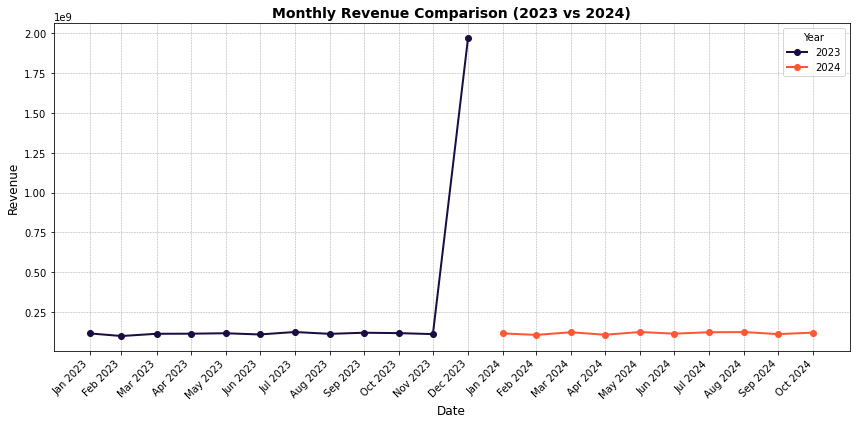

In [135]:
# Memisahkan data berdasarkan tahun
monthly_2023 = monthly[monthly.index.year == 2023]
monthly_2024 = monthly[monthly.index.year == 2024]

# Plot grafik dengan style yang lebih menarik
plt.figure(figsize=(12, 6))

# Line chart untuk 2023
plt.plot(
    monthly_2023.index, 
    monthly_2023.values, 
    label='2023', 
    color='#1B0C41', 
    linewidth=2, 
    marker='o'
)


# Line chart untuk 2024
plt.plot(
    monthly_2024.index, 
    monthly_2024.values, 
    label='2024', 
    color='#FF5733', 
    linewidth=2, 
    marker='o'
)


# Menambahkan grid dan styling
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Atur sumbu X supaya lebih rapi
plt.xticks(
    monthly.index, 
    labels=[date.strftime('%b %Y') for date in monthly.index], 
    rotation=45, 
    ha='right'
)

# Label dan judul
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.title('Monthly Revenue Comparison (2023 vs 2024)', fontsize=14, fontweight='bold')

# Menambahkan legenda
plt.legend(title="Year", fontsize=10)

# Tampilkan grafik
plt.tight_layout()
plt.show()

The visualization shows an outlier in December 2023, with a revenue of 1,969,401,200. Therefore, steps need to be taken to handle this outlier so that the revenue becomes more accurate and realistic.

**Outlier Handling for December 2023 Data**

In [136]:
monthly.index = pd.to_datetime(monthly.index)

#menggunakan metode IQR
Q1 = monthly.quantile(0.25)
Q3 = monthly.quantile(0.75)
IQR = Q3 - Q1

#menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#identifikasi dan ganti outlier
monthly_no_outliers = monthly.copy()
monthly_no_outliers[(monthly < lower_bound) | (monthly > upper_bound)] = np.nan
monthly_no_outliers.fillna(monthly.median(), inplace=True)

pd.options.display.float_format = '{:,.0f}'.format
monthly_no_outliers

Date
2023-01-31   115,688,300
2023-02-28    99,305,700
2023-03-31   113,340,400
2023-04-30   113,866,100
2023-05-31   116,711,000
2023-06-30   109,045,000
2023-07-31   124,492,500
2023-08-31   112,937,000
2023-09-30   119,942,700
2023-10-31   117,437,800
2023-11-30   111,249,000
2023-12-31   115,646,650
2024-01-31   115,605,000
2024-02-29   106,298,500
2024-03-31   122,891,200
2024-04-30   107,311,900
2024-05-31   124,421,100
2024-06-30   114,166,800
2024-07-31   123,041,000
2024-08-31   124,029,500
2024-09-30   111,212,700
2024-10-31   120,846,500
Freq: M, Name: Revenue, dtype: float64

The result above shows the removal of the outlier in December 2023 using the Median. Previously, the outlier was handled using the Mean, but the result still showed a high revenue for December 2023, which did not reflect good performance. Therefore, it was decided to use the Median, which is more resistant to extreme values, to handle the outlier. By using the Median, the revenue for December 2023 became more stable and better aligned with the revenue pattern of other months.

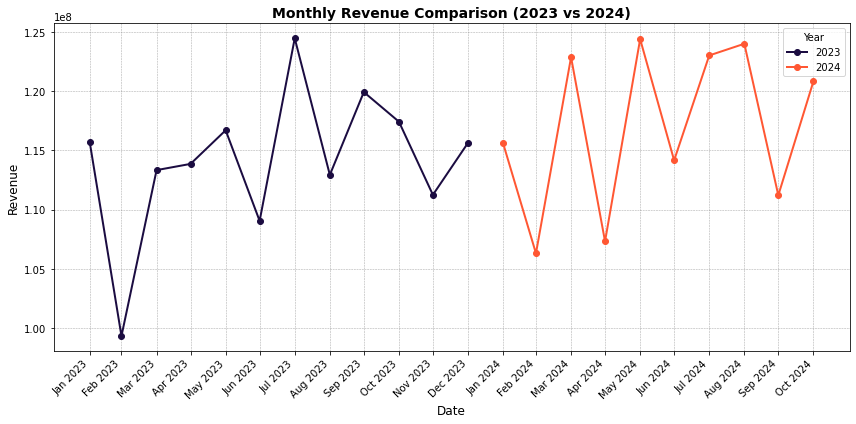

In [137]:
#memisahkan data berdasarkan tahun
monthly_2023 = monthly_no_outliers[monthly_no_outliers.index.year == 2023]
monthly_2024 = monthly_no_outliers[monthly_no_outliers.index.year == 2024]

plt.figure(figsize=(12, 6))

#line chart untuk 2023
plt.plot(
    monthly_2023.index, 
    monthly_2023.values, 
    label='2023', 
    color='#1B0C41', 
    linewidth=2, 
    marker='o'
)


#line chart untuk 2024
plt.plot(
    monthly_2024.index, 
    monthly_2024.values, 
    label='2024', 
    color='#FF5733', 
    linewidth=2, 
    marker='o'
)


plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.xticks(
    monthly_no_outliers.index, 
    labels=[date.strftime('%b %Y') for date in monthly.index], 
    rotation=45, 
    ha='right'
)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.title('Monthly Revenue Comparison (2023 vs 2024)', fontsize=14, fontweight='bold')

plt.legend(title="Year", fontsize=10)

plt.tight_layout()
plt.show()

The line chart shown after handling the outlier displays a better graph with no visible outliers.

**- PRODUCT PERFORMANCE -**

**1. Product Quantity Sold**

In [138]:
product_qty = result.groupby('Product Name')['Sales Qty'].sum()
product_qty_sort = product_qty.sort_values(ascending=False)
product_qty_sort

Product Name
200 Vanilla    222161
200 Choco      101477
200 Almond      55784
500 Choco       36142
500 Vanilla     23222
Name: Sales Qty, dtype: int64

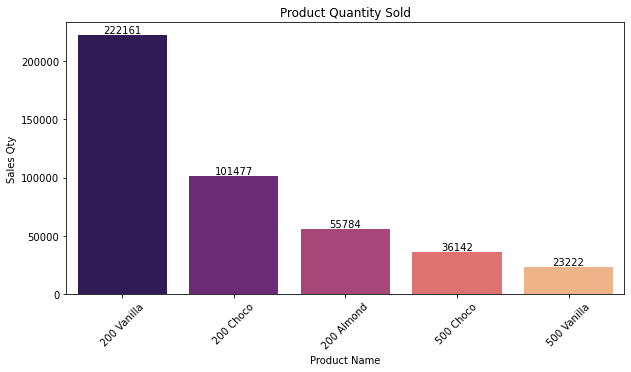

In [139]:
#reset index dan ganti nama kolom
product_qty_sort = product_qty_sort.reset_index()
product_qty_sort.columns = ['Product Name', 'Sales Qty']  # Harus 2 kolom: 'Product Name' dan 'Sales Qty'

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Product Name', y='Sales Qty', data=product_qty_sort, palette='magma')

#tambah label pada setiap batang
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge')

plt.xticks(rotation=45)  
plt.title('Product Quantity Sold')
plt.xlabel('Product Name')
plt.ylabel('Sales Qty')  
plt.show()

**Managing Outlier Effects on Product Quantity Sold**

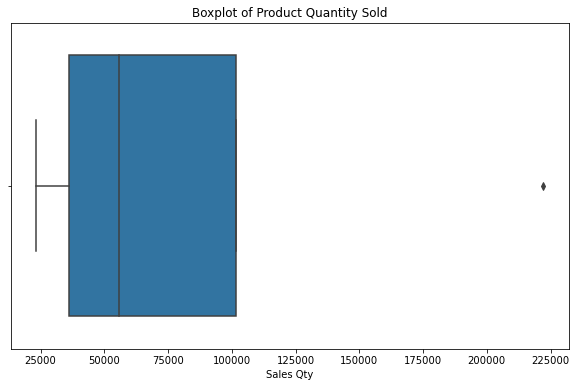

In [140]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=product_qty)
plt.title('Boxplot of Product Quantity Sold')
plt.show()

The boxplot above shows that the Product Quantity Sold has outliers, which can be seen from the data points outside the whiskers (the horizontal lines on both sides of the box). Therefore, further action is needed to address these outliers and make the results more realistic.

In [141]:
result_copy = result.copy()

#loop untuk setiap produk
for product in result_copy['Product Name'].unique():
    qty = result_copy[result_copy['Product Name'] == product]['Sales Qty']
    
    #hitung Q1, Q3, dan IQR
    Q1 = qty.quantile(0.25)
    Q3 = qty.quantile(0.75)
    IQR = Q3 - Q1
    
    #menentukan batas bawah dan atas untuk produk ini
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    product_median = qty.median()

    #ganti outlier dengan median
    result_copy.loc[(result_copy['Product Name'] == product) & 
                    ((result_copy['Sales Qty'] < lower_bound) | 
                     (result_copy['Sales Qty'] > upper_bound)), 'Sales Qty'] = product_median

#hitung total Sales Qty per produk setelah mengganti outlier
product_qty_no_outliers = result_copy.groupby('Product Name')['Sales Qty'].sum()


product_qty_no_outliers_sort = product_qty_no_outliers.sort_values(ascending=False)
product_qty_no_outliers_sort

Product Name
200 Vanilla    73359
200 Choco      39703
200 Almond     27091
500 Choco      18648
500 Vanilla    13701
Name: Sales Qty, dtype: int64


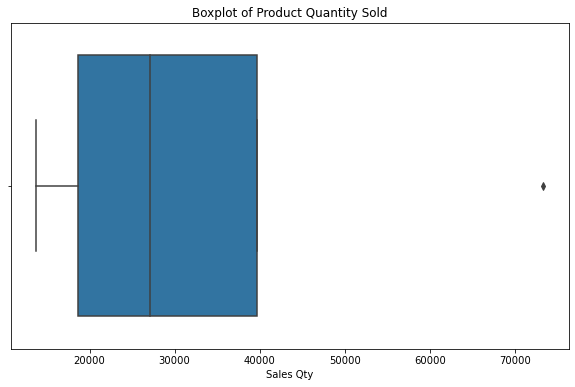

In [142]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=product_qty_no_outliers_sort)
plt.title('Boxplot of Product Quantity Sold')
plt.show()

After handling the outliers, the results are still the same. The boxplot shows that there are still data points outside the whiskers (the horizontal lines on both sides of the box). If outliers are still visible after handling, it could mean that the adjusted values are good, but there might still be outliers. Further analysis may be needed to check if the outlier handling was successful or if the values are already correct without outliers.

**2. Revenue by Product**

In [143]:
product_revenue = result.groupby('Product Name')['Revenue'].sum()
product_revenue_sort = product_revenue.sort_values(ascending=False)
product_revenue_sort

Product Name
200 Vanilla    1743991400
200 Choco       874814300
500 Choco       838703000
500 Vanilla     473644400
200 Almond      462087800
Name: Revenue, dtype: int64

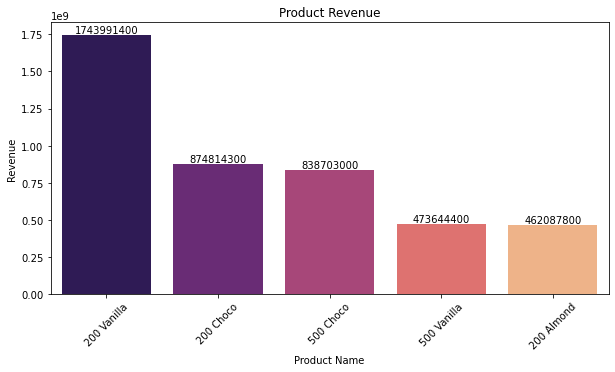

In [144]:
#eset index dan ganti nama kolom
product_revenue_sort = product_revenue_sort.reset_index()
product_revenue_sort.columns = ['Product Name', 'Revenue']

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Product Name', y='Revenue', data=product_revenue_sort, palette='magma')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge')

plt.xticks(rotation=45)
plt.title('Product Revenue') 
plt.xlabel('Product Name') 
plt.ylabel('Revenue') 
plt.show()

**Managing Outlier Effects on Product Revenue**

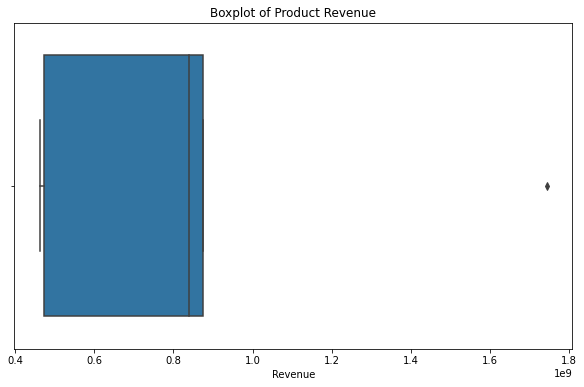

In [145]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=product_revenue)
plt.title('Boxplot of Product Revenue')
plt.show()

The boxplot above shows that there are outliers in the revenue of each product, with data points outside the whiskers (the horizontal lines on both sides of the box). This indicates that some revenue values are much higher than the others. Therefore, further action is needed to handle these outliers so that the revenue values for each product are more accurate and appropriate.

In [146]:
#menggunakan IQR untuk memeriksa outlier pada revenue per produk
Q1 = product_revenue.quantile(0.25)
Q3 = product_revenue.quantile(0.75)
IQR = Q3 - Q1

#menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#mengidentifikasi dan ganti outlier
product_revenue_outliers = product_revenue.copy()
product_revenue_outliers[(product_revenue < lower_bound) | (product_revenue > upper_bound)] = np.nan
product_revenue_outliers.fillna(product_revenue.median(), inplace=True) 

product_no_outliers = product_revenue_outliers.sort_values(ascending=False)
product_no_outliers

Product Name
200 Choco     874,814,300
200 Vanilla   838,703,000
500 Choco     838,703,000
500 Vanilla   473,644,400
200 Almond    462,087,800
Name: Revenue, dtype: float64

The method used to address the outliers in the revenue for each product was the Median. The Median was chosen because it provides a more stable representation and is not influenced by extreme values. If the Mean were used, it would be necessary to consider whether the revenue spike in December 2023 is normal and if it could happen again in the following year. Since the data only goes up to October 2024, it's unclear whether this spike reflects a consistent pattern. Therefore, for the analysis of product revenue, using the Median is considered the best approach to handle the outlier in December 2023.

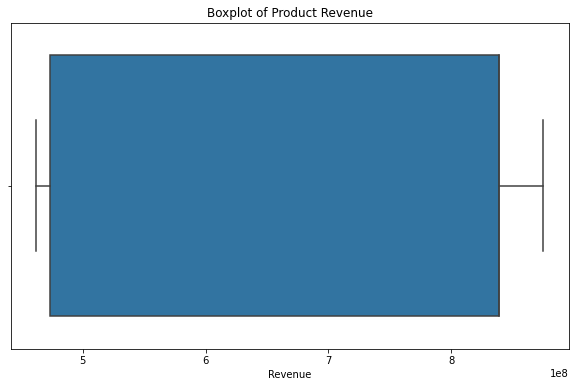

In [147]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=product_no_outliers)
plt.title('Boxplot of Product Revenue')
plt.show()

The boxplot shown indicates that the revenue values, after being processed with the Median, are more stable and no longer affected by outliers. This can be seen from the more balanced interquartile range, with no extreme data points that would cause the distribution to become skewed. As a result, the revenue data for each product is more representative and can be used for further analysis without bias from extreme values.

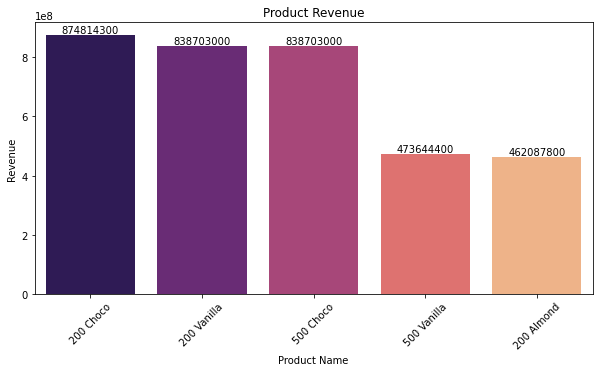

In [148]:
product_no_outliers = product_no_outliers.reset_index()
product_no_outliers.columns = ['Product Name', 'Revenue']

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Product Name', y='Revenue', data=product_no_outliers, palette='magma')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge')

plt.xticks(rotation=45)
plt.title('Product Revenue')
plt.xlabel('Product Name')
plt.ylabel('Revenue')
plt.show()

The bar chart displayed shows more stable values compared to before the outlier management process. The revenue achieved is considered good, and there are no visible outliers. The highest product revenue is from 200 Choco, with a revenue of 874,814,300, while the lowest revenue comes from 200 Almond, with a revenue of 462,087,800.

**- FUTURE SALES FORECAST -**

In the future sales forecasting or revenue prediction analysis, tests were done using several models, such as Linear Regression and Prophet. The RMSE results from each model are shown to help determine which model fits the data best. However, the RMSE value alone should not be the only measure of modeling success because other factors, such as the prediction pattern matching the historical data dynamics, are also important to ensure forecasting accuracy.

However, the revenue predictions still show values that are not very good or consistent, possibly caused by factors like the presence of outliers or other issues. Therefore, further processing is needed to understand the reasons for this mismatch.

Nevertheless, the experiments with these two models provide a good starting point and can be considered as models that are capable of producing adequate results.

In [149]:
#mengembalikan index menjadi kolom
result = result.reset_index()  

**Linear Regression**

In [150]:
#mengonversi kolom 'Date' menjadi fitur numerik
result['Date'] = pd.to_datetime(result['Date'])
result['Year'] = result['Date'].dt.year
result['Month'] = result['Date'].dt.month


#encoding categorical features
encoded_data = pd.get_dummies(result, columns=['Product Name'], drop_first=True)

#target split
X = encoded_data.drop(['Revenue', 'Date'], axis=1)
y = encoded_data['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"MAE for Linear Regression: {(mae_lr).round()}")
print(f"RMSE for Linear Regression: {(rmse_lr).round()}")

MAE for Linear Regression: 112700.0
RMSE for Linear Regression: 579795.0


The first step before making future revenue predictions is to check the RMSE value, which shows whether the model is good enough for the data used in forecasting. The RMSE value obtained is 579,795, which is considered low, making it suitable for forecasting because the model’s predictions are closer to the training data.

In [152]:
monthly_revenue = result.groupby(result["Date"].dt.to_period("M"))["Revenue"].sum()

In [153]:
#mengisi NaN dan memastikan tidak ada nilai negatif
monthly_revenue = monthly_revenue.interpolate(method="linear").fillna(1e-6)
monthly_revenue[monthly_revenue <= 0] = 1e-6

#transformasi logaritma
log_monthly_revenue = np.log(monthly_revenue)

#membuat variabel X (bulan) dan y (revenue logaritma)
X = np.array(range(len(log_monthly_revenue))).reshape(-1, 1)
y = log_monthly_revenue.values

lin_reg_model = LinearRegression()
lin_reg_model.fit(X, y)

#prediksi untuk 14 bulan ke depan
future_months = np.array(range(len(log_monthly_revenue), len(log_monthly_revenue) + 14)).reshape(-1, 1)
forecast_log_lr = lin_reg_model.predict(future_months)

#kembali ke skala asli dengan eksponensial
forecast_lr = np.exp(forecast_log_lr)

#menentukan tanggal untuk prediksi
last_date = monthly_revenue.index[-1].to_timestamp()
forecast_dates = pd.date_range(start=last_date, periods=15, freq="M")[1:]

forecast_lr_df = pd.DataFrame(forecast_lr, index=forecast_dates, columns=["Revenue Predicted"])
forecast_lr_df

            Revenue Predicted
2024-11-30        138,452,673
2024-12-31        139,111,248
2025-01-31        139,772,955
2025-02-28        140,437,810
2025-03-31        141,105,828
2025-04-30        141,777,023
2025-05-31        142,451,411
2025-06-30        143,129,007
2025-07-31        143,809,825
2025-08-31        144,493,883
2025-09-30        145,181,194
2025-10-31        145,871,774
2025-11-30        146,565,639
2025-12-31        147,262,805


The revenue prediction for the future using the Linear Regression model shows an increasing trend every month. However, this pattern does not match the original data, which shows a fluctuating revenue pattern. Although the RMSE value of this model is quite low and indicates that the model is statistically suitable for the data, the predictions do not align with the actual dynamics. Due to its linear nature, this model tends to predict growth with a stable pattern (monotonically increasing or decreasing). As a result, the model fails to represent the significant fluctuations in revenue seen in the actual data.

**Prophet**

In [155]:
data_prophet = result[['Date', 'Revenue']].reset_index(drop=True)
data_prophet.columns = ['ds', 'y']

#memastikan data positif dan terapkan log-transformasi
data_prophet['y'] = np.log1p(data_prophet['y'])

#inisialisasi model Prophet
model_prophet = Prophet(
    yearly_seasonality=True, 
    daily_seasonality=False, 
    changepoint_prior_scale=0.1, 
    seasonality_prior_scale=10.0
)

#latih model
model_prophet.fit(data_prophet)

future = model_prophet.make_future_dataframe(periods=14, freq='M')
forecast = model_prophet.predict(future)

#mengembalikan hasil prediksi ke skala asli (exponential)
forecast['Predicted Revenue'] = np.expm1(forecast['yhat'])

print(forecast[['Predicted Revenue']].tail(14))

13:16:28 - cmdstanpy - INFO - Chain [1] start processing
13:16:43 - cmdstanpy - INFO - Chain [1] done processing


      Predicted Revenue
7581          8,512,364
7582         43,136,644
7583         80,493,303
7584         75,110,770
7585         61,203,709
7586         64,110,115
7587        113,363,846
7588         61,651,732
7589         57,906,994
7590         82,865,699
7591         59,228,210
7592        114,515,884
7593        784,052,724
7594      5,545,682,542


The revenue prediction for the future using the Prophet model shows a fluctuating pattern that is closer to the historical data compared to the Linear Regression model. However, the predicted revenue values for some months are very different from the historical data. While this model can capture seasonal patterns and fluctuations, its predictions are not accurate enough to represent the actual data. This issue may be caused by overfitting on some of the historical data, leading to large errors.

Even though Prophet is more suitable for predicting fluctuating data like revenue, the prediction results still need to be evaluated further to ensure accuracy and usefulness for decision-making.

In [156]:
dates_true = set(data['Date'])
dates_pred = set(forecast['ds'])

#mencari perbedaan tanggal
missing_in_pred = dates_true - dates_pred
missing_in_true = dates_pred - dates_true

In [157]:
common_dates = dates_true & dates_pred

#filter data
data_filtered = result[result['Date'].isin(common_dates)]
forecast_filtered = forecast[forecast['ds'].isin(common_dates)]

In [158]:
data_filtered['Revenue'] = pd.to_numeric(data_filtered['Revenue'], errors='coerce')
forecast_filtered['yhat'] = pd.to_numeric(forecast_filtered['yhat'], errors='coerce')

#menghilangkan baris dengan nilai kosong
data_filtered = data_filtered.dropna(subset=['Revenue'])
forecast_filtered = forecast_filtered.dropna(subset=['yhat'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_1100\1596903177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Revenue'] = pd.to_numeric(data_filtered['Revenue'], errors='coerce')
C:\Users\DELL\AppData\Local\Temp\ipykernel_1100\1596903177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_filtered['yhat'] = pd.to_numeric(forecast_filtered['yhat'], errors='coerce')


In [159]:
#gabungkan berdasarkan tanggal
merged_data = pd.merge(
    data_filtered[['Date', 'Revenue']], 
    forecast_filtered[['ds', 'yhat']], 
    left_on='Date', 
    right_on='ds', 
    how='inner'
)

y_true = merged_data['Revenue']
y_pred = merged_data['yhat']

In [160]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {(rmse).round()}")

Mean Absolute Error (MAE): 441128.9480694705
Root Mean Squared Error (RMSE): 5874931.0


The RMSE value from the Prophet model is quite high, at 5,874,931, which shows that statistically, this model seems less suitable or accurate for this process. However, even though the RMSE is higher than other models, Prophet has an advantage in modeling more realistic patterns in the data. This makes it better for forecasting data with fluctuating patterns, like revenue in the historical data used. The high RMSE, or in other words, the large error, is likely caused by overfitting on some of the historical data.